# Making single stain dataset

https://www.kaggle.com/code/yusaku5739/stain-normalized-dataset-768-768/notebook

In [10]:
from glob import glob
import cv2 as cv

import gc
import os
import cv2
import zipfile
import numpy as np
import pandas as pd
from PIL import Image
import tifffile as tiff
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from torch.utils.data import Dataset

In [2]:
import sys
sys.path.append('../input/stainnet/')
from models import StainNet, ResnetGenerator
import torch

In [3]:
device = 'cuda:2'

In [4]:
def norm(image):
    image = np.array(image).astype(np.float32)
    image = image.transpose((2, 0, 1))
    image = ((image / 255) - 0.5) / 0.5
    image=image[np.newaxis, ...]
    image=torch.from_numpy(image)
    return image

def un_norm(image):
    image = image.cpu().detach().numpy()[0]
    image = ((image * 0.5 + 0.5) * 255).astype(np.uint8).transpose((1,2,0))
    return image

In [7]:
model_Net = StainNet().to(device)
model_Net.load_state_dict(torch.load("checkpoints/aligned_histopathology_dataset/StainNet-Public_layer3_ch32.pth"))
model_Net.eval()

StainNet(
  (rgb_trans): Sequential(
    (0): Conv2d(3, 32, kernel_size=(1, 1), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
    (3): ReLU(inplace=True)
    (4): Conv2d(32, 3, kernel_size=(1, 1), stride=(1, 1))
  )
)

In [17]:
def stain_normalize(source, verbose=False):
    with torch.no_grad():
        img_net=model_Net(norm(source).to(device))
        img_net=un_norm(img_net)
        if verbose: plt.imshow(img_net); plt.show()
        return img_net

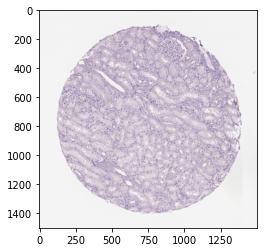

In [21]:
img = cv.imread('./../data/train_images_1500/13034.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

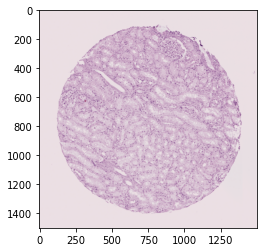

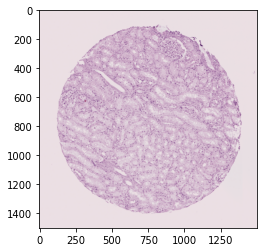

In [22]:
img_stained = stain_normalize(img, verbose=True)
# img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img_stained)
plt.show()

In [23]:
!mkdir ./../data/train_images_1500_stained/

In [ ]:
from tqdm import tqdm

In [25]:
for fname in tqdm(list(sorted(glob('./../data/train_images_1500/*.png')))):
    img = cv.imread(fname)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    img_stained = stain_normalize(img, verbose=False)
    img_stained = cv.cvtColor(img_stained, cv.COLOR_RGB2BGR)
    
    new_fname = fname.replace('train_images_1500', 'train_images_1500_stained')
    cv.imwrite(new_fname, img_stained)

  0%|          | 0/351 [00:00<?, ?it/s]